# Welcome to PyHEP 2020!

<br><br><br>

Before writing this tutorial, I took a look at the survey...

In [ ]:
import pandas
df = pandas.read_csv("survey-results.csv")
df

In [ ]:
df["Professional life: What best describes your occupation?"].value_counts(ascending=True).plot.barh();

In [ ]:
df["Professional life: What best describes the stage of your professional career?"].value_counts(ascending=True).plot.barh();

In [ ]:
languages = [
    "C or C++",
    "Python",
    "Matlab",
    "Javascript or other browser-based (e.g. TypeScript, CoffeeScript)",
    "Verilog, VHDL, or other hardware description language",
    "R",
    "Java or other JVM-based (e.g. Kotlin, Scala, Clojure)",
    "Perl",
    "PHP",
    "C#",
    "Julia",
    "Go",
    "Swift",
    "Rust",
    "Ruby",
    "Haskell",
    "Raw assembly or machine code",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if language in responses else 0.0 for language in languages]
exploded = df[["Computing and programming: Which of the following languages do you use regularly (i.e. more than 10% of your work)?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=languages)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7));

In [ ]:
df[[
    "Computing and programming: Do you *expect* to use Python more or less in the future (as a fraction of your programming time)?",
    "Computing and programming: Do you *want* to use Python more or less in the future (as a fraction of your programming time)?"
]].apply(pandas.Series.value_counts).loc[["Less", "About the same", "More", "Don't know"]].plot.bar(rot=0).legend(bbox_to_anchor=(1.2, 0.5));

In [ ]:
cols = {x: x.split(":")[1].strip() for x in df.columns if x.startswith("Python ecosystem:") and "?" not in x}
order = ((df[list(cols)] == "Don't know what it is") | (df[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = df[order].rename(columns=cols).apply(pandas.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(20, 20), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"]).legend(bbox_to_anchor=(1.2, 0.5));

In [ ]:
cols = {x: x.split(":")[1].strip() for x in df.columns if x.startswith("Particle physics ecosystem:") and "?" not in x}
order = ((df[list(cols)] == "Don't know what it is") | (df[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = df[order].rename(columns=cols).apply(pandas.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(20, 20), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"]).legend(bbox_to_anchor=(1.2, 0.5));

In [ ]:
hopes = [
    "Particle physics analysis tools (other than ROOT)",
    "General-purpose data analysis toolkits",
    "Machine learning/deep learning toolkits",
    "Software engineering skills (beyond the fundamentals)",
    "ROOT and PyROOT",
    "Python fundamentals (how to program in Python)",
    "Collaboration-specific topics",
    "Other",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if hope in responses else 0.0 for hope in hopes]
exploded = df[["PyHEP feedback: What are you hoping to learn from this workshop?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=hopes)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7));

<br><br><br><br><br>

## Conclusions:

   1. You are mostly grad students and postdocs engaged in physics research.
   2. You use Python and C++ about equally, but want to use Python more.
   3. You are familiar with the major libraries of the Python world: NumPy, Matplotlib, machine learning.
   4. You are less familiar with Python libraries intended for physics analysis.
   5. But you want to learn.

So let's get started!

<br><br><br><br><br>

<img src="img/uproot-logo-300px.png" alt="Uproot" width="300px" style="margin-bottom: -50px; margin-right: 20px"><font size="5"> is a pure-Python implementation of ROOT I/O.</font>

<br><br>

<img src="img/abstraction-layers.png" width="900px">

<img src="img/awkward-logo-600px.png" alt="Uproot" width="350px" style="margin-bottom: -29px; margin-right: 20px"><font size="5"> is a generalization of NumPy to data structures (such as jagged arrays).</font>

<br><br>

<img src="img/cartoon-schematic.png" width="1000px">

<br><br><br>

# Interesting times!

<font size="4">We happen to be in the middle of a transition from <b>Uproot 3.x → Uproot 4.x</b> and <b>Awkward 0.x → Awkward 1.x</b>.</font>

<img src="img/uproot-awkward-timeline.png" width="900px">

<font size="4">You can use both! Old and new versions are independently installable/importable.</font>

<table style="font-size: 1.5em; font-weight: bold; margin-left: 0px">
    <tr style="background: white"><td></td><td style="color: gray">Now</td><td style="color: gray">Later this year</td></tr>
    <tr style="background: white"><td style="color: gray">Old versions</td><td style="color: blue">uproot, awkward</td><td>uproot3, awkward0</td></tr>
    <tr style="background: white"><td style="color: gray">New versions</td><td>uproot4, awkward1</td><td style="color: blue">uproot, awkward</td></tr>
</table>

<img src="img/Raiders-of-the-Lost-Ark-Chamber.jpg" width="800px">

<br><br><br><br><br>

# What will this tutorial use?

New versions of both: **Uproot 4** and **Awkward 1**. This tutorial is bleeding edge.

In [1]:
import uproot4
import awkward1 as ak
import numpy as np

Uproot provides a short path from ROOT files to arrays.

In [2]:
np.array(uproot4.open("data/opendata_muons.root:Events/nMuon"))

array([2, 1, 2, ..., 2, 2, 2], dtype=uint32)

Let's break that down.

In [3]:
root = uproot4.open("data/opendata_muons.root")
root

<ReadOnlyDirectory '/' at 0x7f4170763b10>

When you open a file, you get its root directory, which has the properties of a Python dict.

You can list its keys.

In [4]:
root.keys()

['Events;1']

You can get an item from it using square brackets.

In [5]:
root["Events"]

<TTree 'Events' (15 branches) at 0x7f415846a290>

(The `;1` wasn't necesssary—it's a "cycle number," which ROOT uses to distinguish objects in the same directory with the same name. If unspecified, you get the highest cycle number.)

In [6]:
from collections.abc import Mapping

isinstance(root, Mapping)

True

You can also get listings of objects by type.

In [7]:
root.classnames()

{'Events': 'TTree'}

Perhaps this file is more interesting:

In [8]:
nesteddirs = uproot4.open("data/nesteddirs.root")

In [9]:
nesteddirs.keys()

['one;1',
 'one/two;1',
 'one/two/tree;1',
 'one/tree;1',
 'three;1',
 'three/tree;1']

In [10]:
nesteddirs["one/two"]

<ReadOnlyDirectory '/one/two' at 0x7f415846a150>

In [11]:
nesteddirs["one/two"].keys()

['tree;1']

In [12]:
nesteddirs.classnames()

{'one': 'TDirectory',
 'one/two': 'TDirectory',
 'one/two/tree': 'TTree',
 'one/tree': 'TTree',
 'three': 'TDirectory',
 'three/tree': 'TTree'}

At all levels, you can filter by name or type.

In [13]:
nesteddirs.keys(filter_classname="TTree")

['one/two/tree;1', 'one/tree;1', 'three/tree;1']

In [14]:
nesteddirs.classnames(filter_name="*t*")

{'one/two': 'TDirectory',
 'one/two/tree': 'TTree',
 'one/tree': 'TTree',
 'three': 'TDirectory',
 'three/tree': 'TTree'}

<img src="img/terminology.png" width="1000px">

It's generally useful to first look at a TTree with `show`.

In [15]:
tree = root["Events"]
tree.show()

name                 | typename             | interpretation                    
---------------------+----------------------+-----------------------------------
run                  | int32_t              | AsDtype('>i4')                    
luminosityBlock      | uint32_t             | AsDtype('>u4')                    
event                | uint64_t             | AsDtype('>u8')                    
PV_npvs              | int32_t              | AsDtype('>i4')                    
PV_x                 | float                | AsDtype('>f4')                    
PV_y                 | float                | AsDtype('>f4')                    
PV_z                 | float                | AsDtype('>f4')                    
nMuon                | uint32_t             | AsDtype('>u4')                    
Muon_pt              | float[]              | AsJagged(AsDtype('>f4'))          
Muon_eta             | float[]              | AsJagged(AsDtype('>f4'))          
Muon_phi             | float

These are all the branches of the TTree with the type name of the branch (if Uproot can determine it) and its interpretation as an array (if possible).

TTrees also have a dict-like interface.

In [16]:
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'PV_npvs',
 'PV_x',
 'PV_y',
 'PV_z',
 'nMuon',
 'Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso04_all',
 'Muon_tightId']

In [17]:
tree.items()

[('run', <TBranch 'run' at 0x7f415846acd0>),
 ('luminosityBlock', <TBranch 'luminosityBlock' at 0x7f415846afd0>),
 ('event', <TBranch 'event' at 0x7f415846b790>),
 ('PV_npvs', <TBranch 'PV_npvs' at 0x7f415846ba10>),
 ('PV_x', <TBranch 'PV_x' at 0x7f415846bf90>),
 ('PV_y', <TBranch 'PV_y' at 0x7f4158476410>),
 ('PV_z', <TBranch 'PV_z' at 0x7f4158476810>),
 ('nMuon', <TBranch 'nMuon' at 0x7f4158476c10>),
 ('Muon_pt', <TBranch 'Muon_pt' at 0x7f41581ed050>),
 ('Muon_eta', <TBranch 'Muon_eta' at 0x7f4158476250>),
 ('Muon_phi', <TBranch 'Muon_phi' at 0x7f415848f150>),
 ('Muon_mass', <TBranch 'Muon_mass' at 0x7f41581ed350>),
 ('Muon_charge', <TBranch 'Muon_charge' at 0x7f41581ed6d0>),
 ('Muon_pfRelIso04_all', <TBranch 'Muon_pfRelIso04_all' at 0x7f41581eda50>),
 ('Muon_tightId', <TBranch 'Muon_tightId' at 0x7f41581edd50>)]

In [18]:
tree.typenames()

{'run': 'int32_t',
 'luminosityBlock': 'uint32_t',
 'event': 'uint64_t',
 'PV_npvs': 'int32_t',
 'PV_x': 'float',
 'PV_y': 'float',
 'PV_z': 'float',
 'nMuon': 'uint32_t',
 'Muon_pt': 'float[]',
 'Muon_eta': 'float[]',
 'Muon_phi': 'float[]',
 'Muon_mass': 'float[]',
 'Muon_charge': 'int32_t[]',
 'Muon_pfRelIso04_all': 'float[]',
 'Muon_tightId': 'bool[]'}

In [19]:
isinstance(tree, Mapping)

True

In [20]:
tree.keys(filter_name="Muon_*")

['Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso04_all',
 'Muon_tightId']

In [21]:
tree.keys(filter_typename="float[]")

['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_pfRelIso04_all']

In [23]:
tree.keys(filter_branch=lambda branch: not isinstance(branch.interpretation, uproot4.AsJagged))

['run', 'luminosityBlock', 'event', 'PV_npvs', 'PV_x', 'PV_y', 'PV_z', 'nMuon']

If a branch has a known interpretation, you can call `array` on it to get an array.

In [24]:
tree["Muon_pt"].array()

<Array [[52, 42.9], [5.02, ... [18.3, 9.72]] type='1000000 * var * float32'>

First thing to notice: this is not a NumPy array. It's because the data have different numbers of values in each element (a jagged array).

In [26]:
tree["Muon_pt"].array()[:20].tolist()

[[52.00833511352539, 42.85704040527344],
 [5.019948482513428],
 [15.967432022094727, 12.481289863586426],
 [53.42825698852539, 38.43761444091797],
 [7.178549766540527, 5.597340106964111],
 [47.27000427246094, 39.6187858581543],
 [5.050840377807617, 16.29404067993164],
 [17.36166763305664, 26.066043853759766],
 [42.84968566894531, 74.1303482055664],
 [33.52196502685547, 21.316774368286133],
 [13.822826385498047, 27.89041519165039],
 [12.187352180480957],
 [24.41823387145996, 3.560229778289795, 28.34453010559082],
 [22.598438262939453, 9.5486421585083],
 [12.511752128601074, 11.833377838134766, 45.572383880615234],
 [35.032833099365234, 36.92668533325195],
 [39.79318618774414, 39.22704315185547],
 [42.45128631591797, 45.18961715698242],
 [17.6611270904541, 7.474045753479004],
 [6.152662754058838]]

We can (in Uproot 4) _force_ it to be a NumPy array, but it isn't pretty:

In [27]:
tree["Muon_pt"].array(library="np")[:20]

array([array([52.008335, 42.85704 ], dtype=float32),
       array([5.0199485], dtype=float32),
       array([15.967432, 12.48129 ], dtype=float32),
       array([53.428257, 38.437614], dtype=float32),
       array([7.17855, 5.59734], dtype=float32),
       array([47.270004, 39.618786], dtype=float32),
       array([ 5.0508404, 16.29404  ], dtype=float32),
       array([17.361668, 26.066044], dtype=float32),
       array([42.849686, 74.13035 ], dtype=float32),
       array([33.521965, 21.316774], dtype=float32),
       array([13.822826, 27.890415], dtype=float32),
       array([12.187352], dtype=float32),
       array([24.418234 ,  3.5602298, 28.34453  ], dtype=float32),
       array([22.598438,  9.548642], dtype=float32),
       array([12.511752, 11.833378, 45.572384], dtype=float32),
       array([35.032833, 36.926685], dtype=float32),
       array([39.793186, 39.227043], dtype=float32),
       array([42.451286, 45.189617], dtype=float32),
       array([17.661127 ,  7.4740458], dtype=

The data type (`dtype`) of this NumPy array is `object`, meaning that each element it contains is a Python object, namely another NumPy array.

The default is for all arrays to be Awkward arrays, but you can override this by specifying `library`.

The difference is that Awkward arrays interpret nested lists as a second dimension, whereas NumPy object arrays do not:

In [28]:
awkward_array = tree["Muon_pt"].array(library="ak")
numpy_array = tree["Muon_pt"].array(library="np")

In [31]:
# from the first 20 events, get the first item
awkward_array[:20, 0]

<Array [52, 5.02, 16, ... 42.5, 17.7, 6.15] type='20 * float32'>

In [32]:
# doesn't work with NumPy object arrays because contents are not guaranteed to be arrays
numpy_array[:20, 0]

IndexError: too many indices for array

Another valid library is Pandas. Pandas has its own way of describing variable length structures (`MultiIndex`).

In [33]:
tree["Muon_pt"].array(library="pd")

entry   subentry
0       0           52.008335
        1           42.857040
1       0            5.019948
2       0           15.967432
        1           12.481290
                      ...    
999997  1            3.336458
999998  0            4.999241
        1           14.161738
999999  0           18.304218
        1            9.717607
Length: 2366345, dtype: float32

In the original one-liner, we used colon (`:`) to separate a file path/URL from an object path to get to the branch:

In [35]:
uproot4.open("data/opendata_muons.root:Events/nMuon")

<TBranch 'nMuon' at 0x7f4102ffa4d0>

And "cast" the branch as a NumPy array, which is the same as calling `array` with `library="np"`.

In [36]:
np.array(uproot4.open("data/opendata_muons.root:Events/nMuon"))

array([2, 1, 2, ..., 2, 2, 2], dtype=uint32)

This can be useful if you're passing the branch to a library that expects an array.

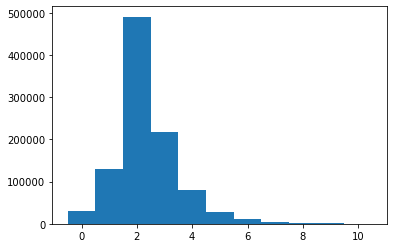

In [38]:
import matplotlib.pyplot as plt

plt.hist(uproot4.open("data/opendata_muons.root:Events/nMuon"), bins=11, range=(-0.5, 10.5));

But be careful; if the array is jagged, the library might not know what to do with it.

KeyboardInterrupt: 

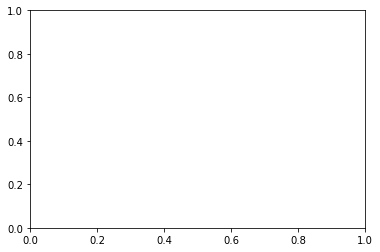

In [41]:
plt.hist(uproot4.open("data/opendata_muons.root:Events/Muon_pt"))